In [1]:
# load Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
# vectorize input data from list of integers to one-hot encoding (from 3.4)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        if i == 0:
            print(sequence)
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize lables to one-hot encoding using built-in keras function
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [3]:
# build network
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# compile network
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-01 12:54:14.806487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 12:54:14.807322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-01 12:54:15.381171: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2023-03-01 12:54:15.588539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 42ms/step - loss: 2.4876 - accuracy: 0.5357 - val_loss: 1.6466 - val_accuracy: 0.6450
Epoch 2/20
 5/16 [========>.....................] - ETA: 0s - loss: 1.4822 - accuracy: 0.6926

2023-03-01 12:54:16.864623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 16ms/step - loss: 1.3620 - accuracy: 0.7073 - val_loss: 1.2858 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0191 - accuracy: 0.7777 - val_loss: 1.1625 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8019 - accuracy: 0.8280 - val_loss: 1.0471 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6405 - accuracy: 0.8658 - val_loss: 0.9950 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5103 - accuracy: 0.8931 - val_loss: 0.9377 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4119 - accuracy: 0.9143 - val_loss: 0.9201 - val_accuracy: 0.8160
Epoch 8/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3350 - accuracy: 0.9282 - val_loss: 0.9303 - val_accuracy: 0.8040
Epoch 9/20
16/16 [======

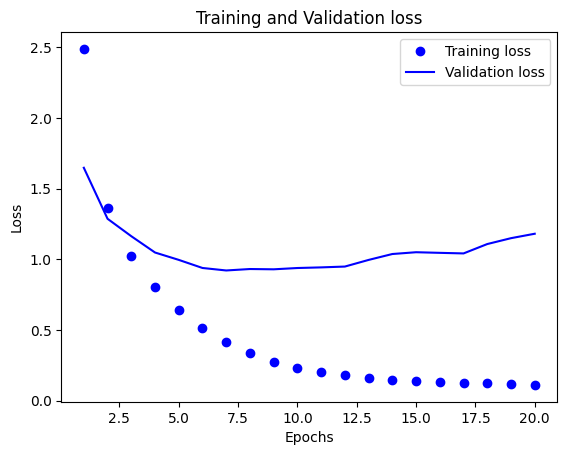

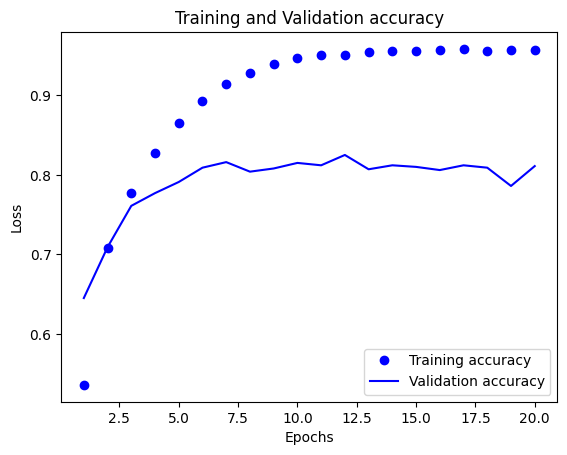

In [4]:
# plot training and validation loss
import matplotlib.pyplot as plt

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# plot training and validation accuracy
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
# train new network with only 9 epochs to avoid overfitting
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/9


2023-03-01 12:54:32.338817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 18ms/step - loss: 2.3455 - accuracy: 0.5598
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.2806 - accuracy: 0.7214
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9640 - accuracy: 0.7897
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7576 - accuracy: 0.8385
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.5978 - accuracy: 0.8727
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4779 - accuracy: 0.9008
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3821 - accuracy: 0.9168
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3093 - accuracy: 0.9321
Epoch 9/9
12/71 [====>.........................] - ETA: 0s - loss: 0.8168 - accuracy: 0.8255

2023-03-01 12:54:34.981835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 11ms/step - loss: 0.9300 - accuracy: 0.7961


[0.9299507737159729, 0.7960819602012634]

In [6]:
# use the trained model to predict the category of new newswires
predictions = model.predict(x_test)

np.argmax(predictions[0]) # prediction for first newswire

2023-03-01 12:54:37.390867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3

In [7]:
# use an integer vector endoding for labels with sparse_categorical_crossentropy loss function
y_train = np.array(train_labels)
y_test = np.array(test_labels)
                  
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/9


2023-03-01 12:54:40.342082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 16ms/step - loss: 2.3402 - accuracy: 0.5557
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.2844 - accuracy: 0.7217
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9625 - accuracy: 0.7905
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7569 - accuracy: 0.8362
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5987 - accuracy: 0.8737
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4726 - accuracy: 0.9010
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3818 - accuracy: 0.9201
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3102 - accuracy: 0.9325
Epoch 9/9
23/71 [========>.....................] - ETA: 0s - loss: 0.8866 - accuracy: 0.8043

2023-03-01 12:54:42.851799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 0s 5ms/step - loss: 0.9364 - accuracy: 0.7943


[0.9364187717437744, 0.7943009734153748]